In [14]:
from scipy.stats import pearsonr

# Beispiel: 10 Jahre Daten
life_expectancy = [79.5, 79.8, 80.0, 80.1, 80.3, 80.5, 80.7, 80.9, 81.0, 81.2]
gdp_per_capita = [26000, 26500, 27000, 27500, 28000, 28500, 29000, 29500, 30000, 30500]

r, p = pearsonr(life_expectancy, gdp_per_capita)
print(f"Korrelationskoeffizient r = {r:.3f}, p-Wert = {p:.4f}")


Korrelationskoeffizient r = 0.997, p-Wert = 0.0000


TypeError: unhashable type: 'numpy.ndarray'

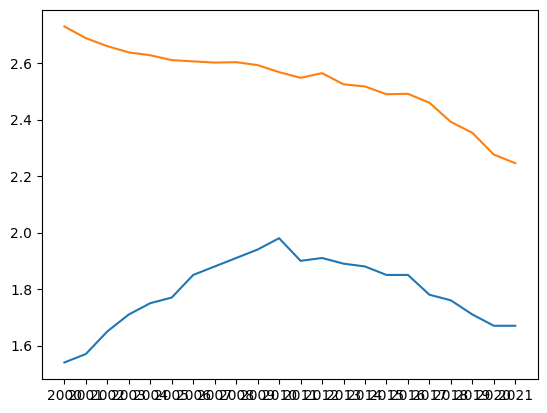

In [12]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import os

# create output folder
os.makedirs("diagram_output", exist_ok=True)
country = "Sweden"

# Read fertility Data
output = pd.read_excel("fertility_rates.xls", sheet_name="Data", index_col=0, skiprows=3)
df = pd.read_csv("death-rate-from-suicides.csv")
country_data = output.loc[country]
world_data = output.loc["World"]

df.columns = ["Entity", "Code", "Year", "SuicideRate"]

sweden_suizide_rates = df[df["Entity"] == country].sort_values("Year")
world_suizide_rates = df[df["Entity"] == "World"].sort_values("Year")

# X-Values (years)
years = country_data.index[3:]  # erste 3 Spalten überspringen
filtered_years = [y for y in years if 2000 <= int(y) <= 2021]


# Y-Values
#sweden_rates = country_data[3:].values
#world_rates = world_data[3:].values
sweden_rates = country_data[filtered_years].values.astype(float)
world_rates = world_data[filtered_years].values.astype(float)

# Create diagram
plt.plot(filtered_years, sweden_rates, label=f"{country} TFR")
plt.plot(filtered_years, world_rates, label="World TFR")
plt.plot(filtered_years, sweden_suizide_rates, label=f"{country} Suiziderate")
plt.plot(filtered_years, world_suizide_rates, label=f"{country} Suiziderate")


# Configure diagram
plt.xticks(filtered_years, rotation=45)
plt.title(f"Fertility Rate: {country} vs. World (1960–2023)")
plt.xlabel("Year")
plt.ylabel("Fertility Rate (births per woman)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save diagram
plt.savefig(f"diagram_output/{country}_vs_world_fertility_rate.png", dpi=1200)

# Show diagram
plt.show()